# Useful librairies

In [3]:
import pandas as pd
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import sys
matplotlib.rcParams["figure.facecolor"] = "white"

# Data Importation

In [4]:
#create a dataframe from the csv file Time_Value_CM.csv 
df = pd.read_csv('Time_Value_CM.csv', names=['Date', 'Value'])
df.head()

,Date,Value
0,2022-05-02T00:01:00Z,178961.742
1,2022-05-02T00:02:00Z,170609.878
2,2022-05-02T00:03:00Z,168829.864
3,2022-05-02T00:04:00Z,173252.734
4,2022-05-02T00:05:00Z,177271.117


# EDA

## Data Overview

In [5]:
#convert the date column to datetime format 
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%dT%H:%M:%SZ")
df.sort_values(by='Date', inplace=True)

In [6]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day_of_week'] = df['Date'].dt.dayofweek.astype(int)
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second

In [7]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0


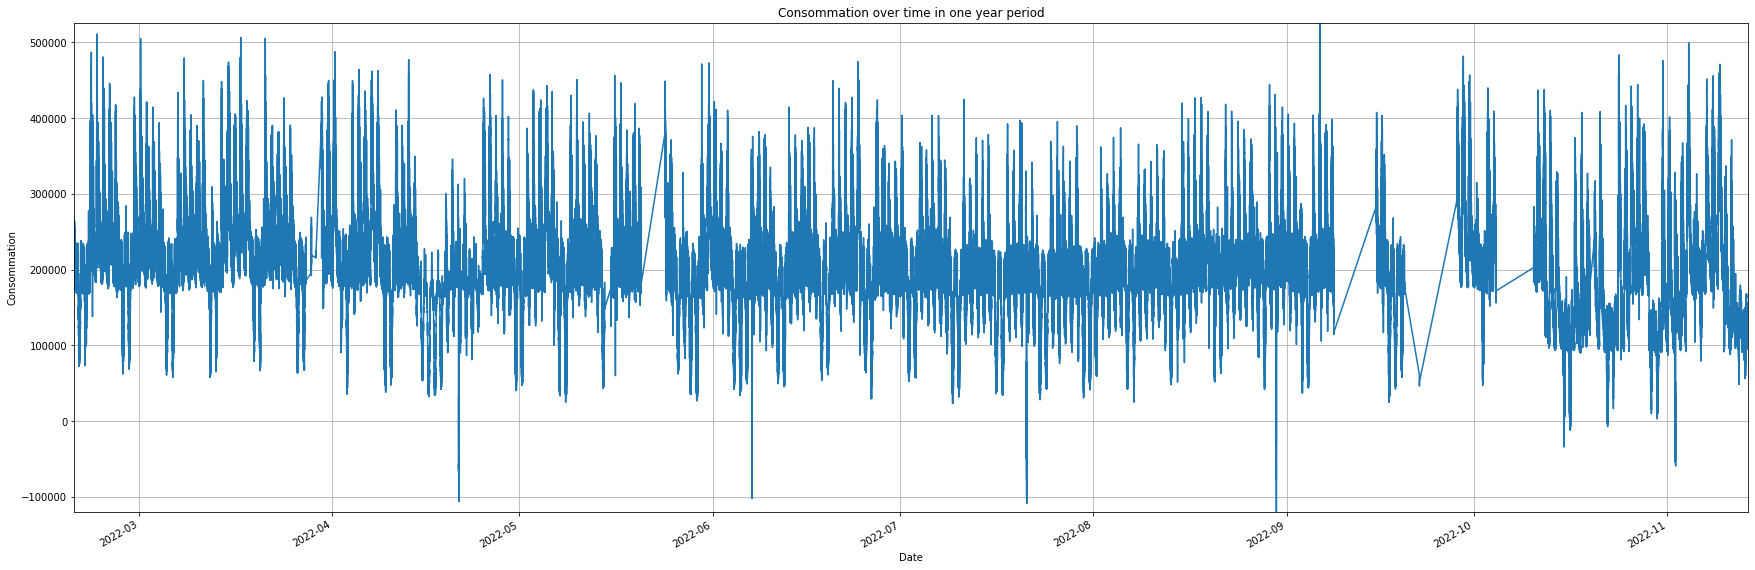

In [8]:
def plot_consommation_over_time_detailed_graph(): 
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one year period')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_detailed_graph()

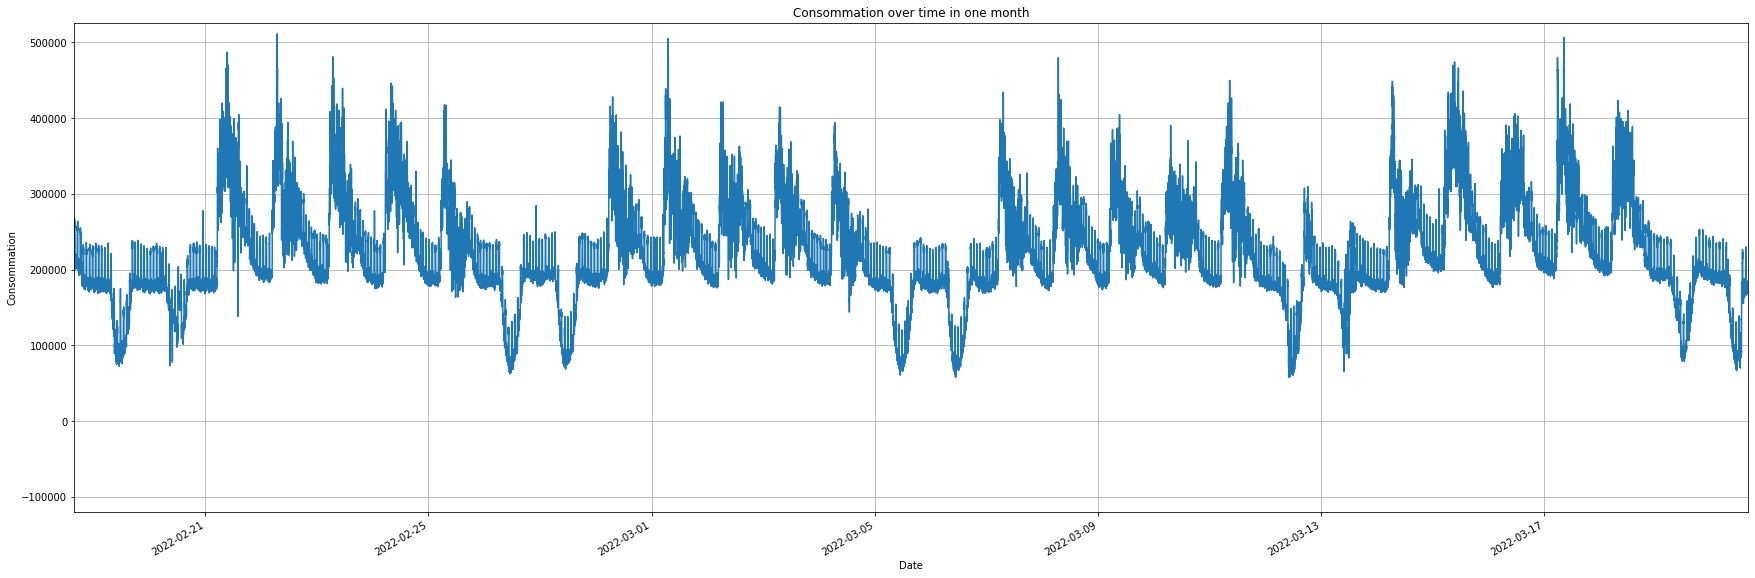

In [9]:
#function to plot the first 30 days 
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()


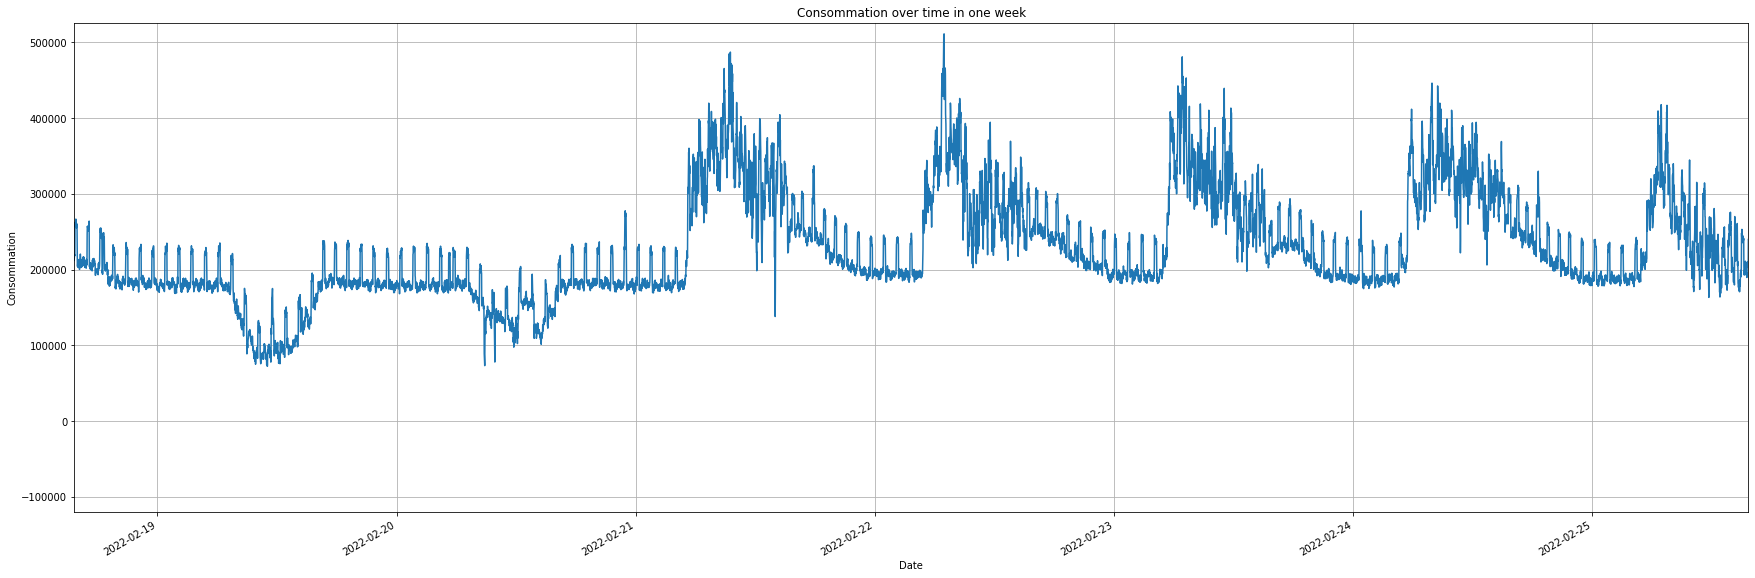

In [10]:
# function to plot the first week 
def plot_consommation_over_time_first_week():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'])
    ax.set_title('Consommation over time in one week')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.DateOffset(days=7))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_first_week()

Features :
- average powers during intervals in the day
- power differences in the morning
- peak power

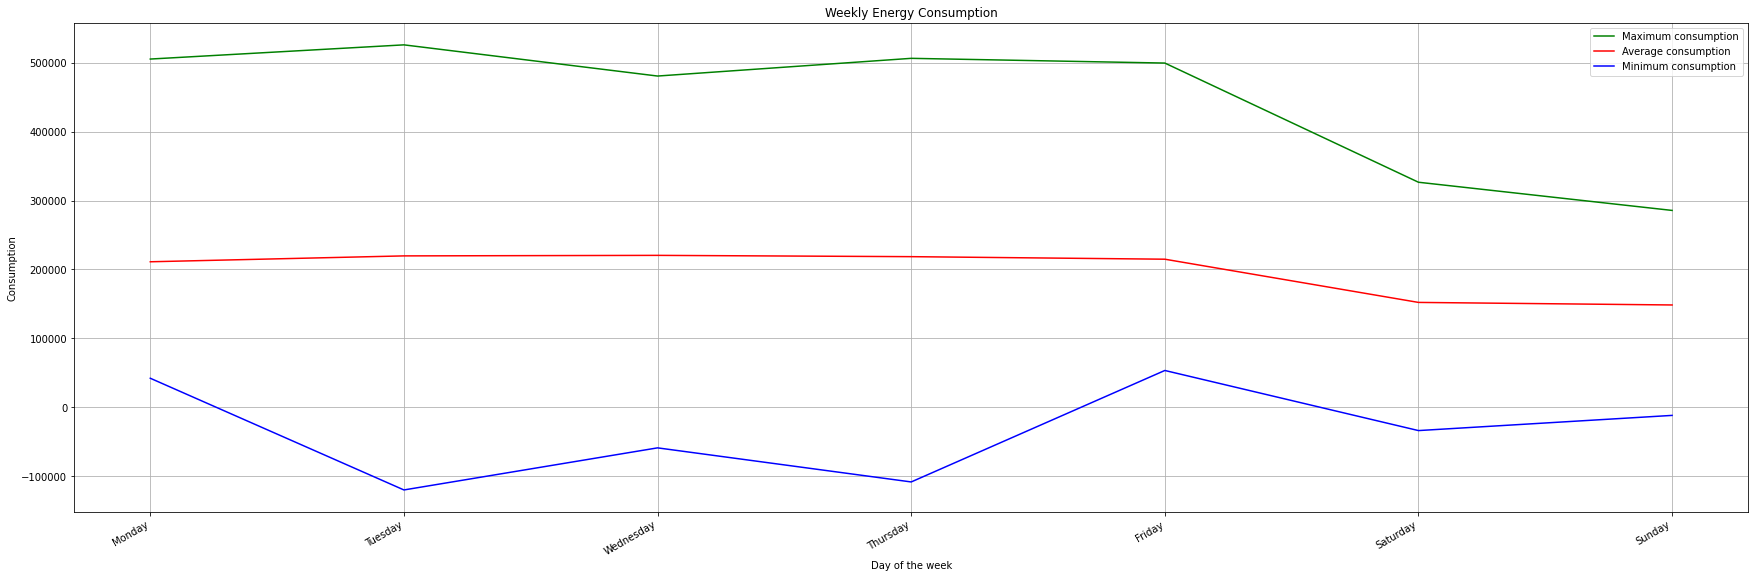

In [11]:
# function to plot the first week 
def plot_weekly_consumption():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df["Value"].groupby(df["Day_of_week"]).max().index, df["Value"].groupby(df["Day_of_week"]).max().values, color= "g", label= "Maximum consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).mean().index, df["Value"].groupby(df["Day_of_week"]).mean().values, color= "r", label= "Average consumption")
    ax.plot(df["Value"].groupby(df["Day_of_week"]).min().index, df["Value"].groupby(df["Day_of_week"]).min().values, color= "b", label= "Minimum consumption")
    ax.set_title('Weekly Energy Consumption')
    ax.set_xlabel('Day of the week')
    ax.set_ylabel('Consumption')
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.xticks([0, 1, 2, 3, 4, 5, 6], ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
    plt.show()

plot_weekly_consumption()

In [12]:
df["Value"].groupby(df["Day_of_week"]).mean().index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='Day_of_week')

## Weekend vs Weekdays

In [13]:
#add a column to datafame with 1 if it is a weekend day and 0 if it is a weekday
df['Weekend'] = df['Date'].dt.dayofweek.isin([5,6]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend
362000,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,0,1
362001,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,0,1
362002,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,0,1
362003,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,0,1
362004,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,0,0


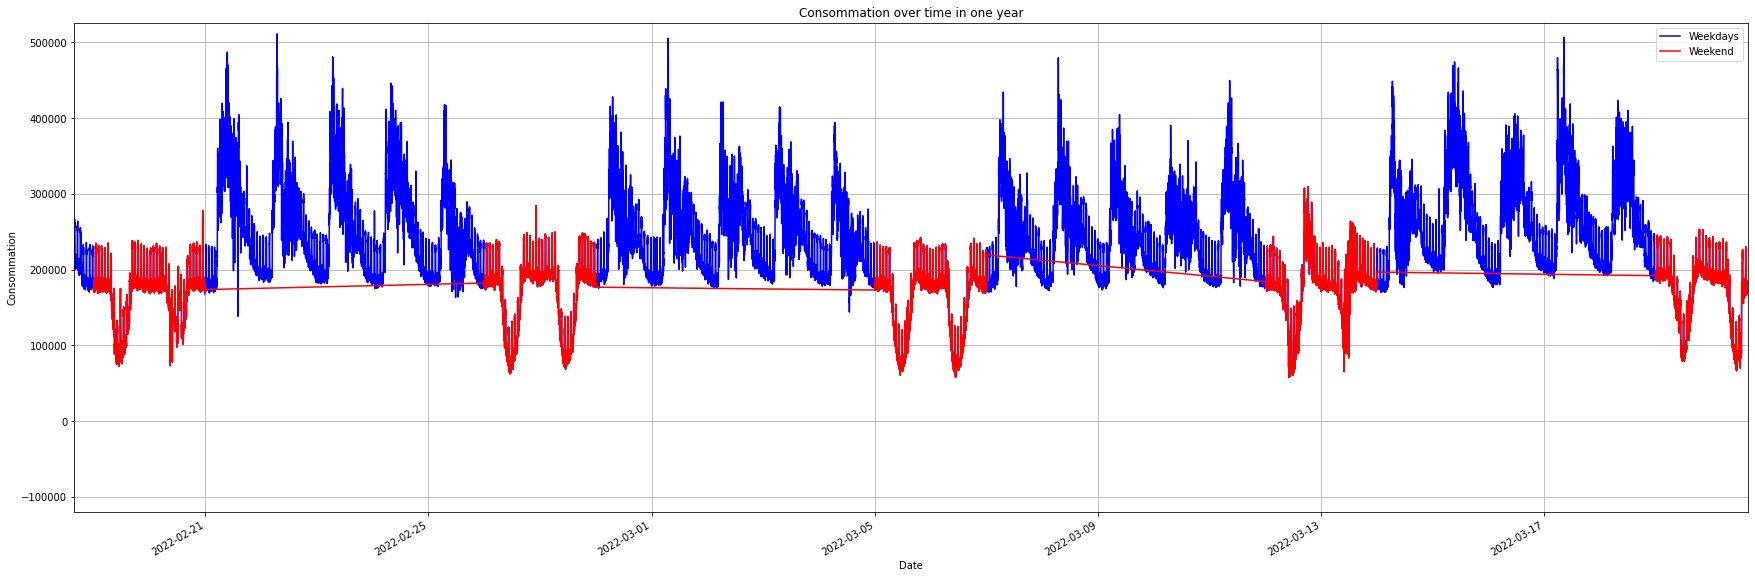

In [14]:
#function to plot the value with another color for the weekend days 
def plot_consommation_over_time_weekend():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Weekdays")
    ax.plot(df[df['Weekend'] == 1]['Date'], df[df['Weekend'] == 1]['Value'], color='red', label= "Weekend")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].min() + pd.Timedelta(days=30))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    ax.legend()
    plt.show()
plot_consommation_over_time_weekend()

- Need to know how much PV on CM rooftop 
- make a ghi feature which correlates in the power variation
- ghi is linked with the temperature 
- https://gate.meteoswiss.ch/idaweb/prepareRegistration.do : Select Lausanne, the day

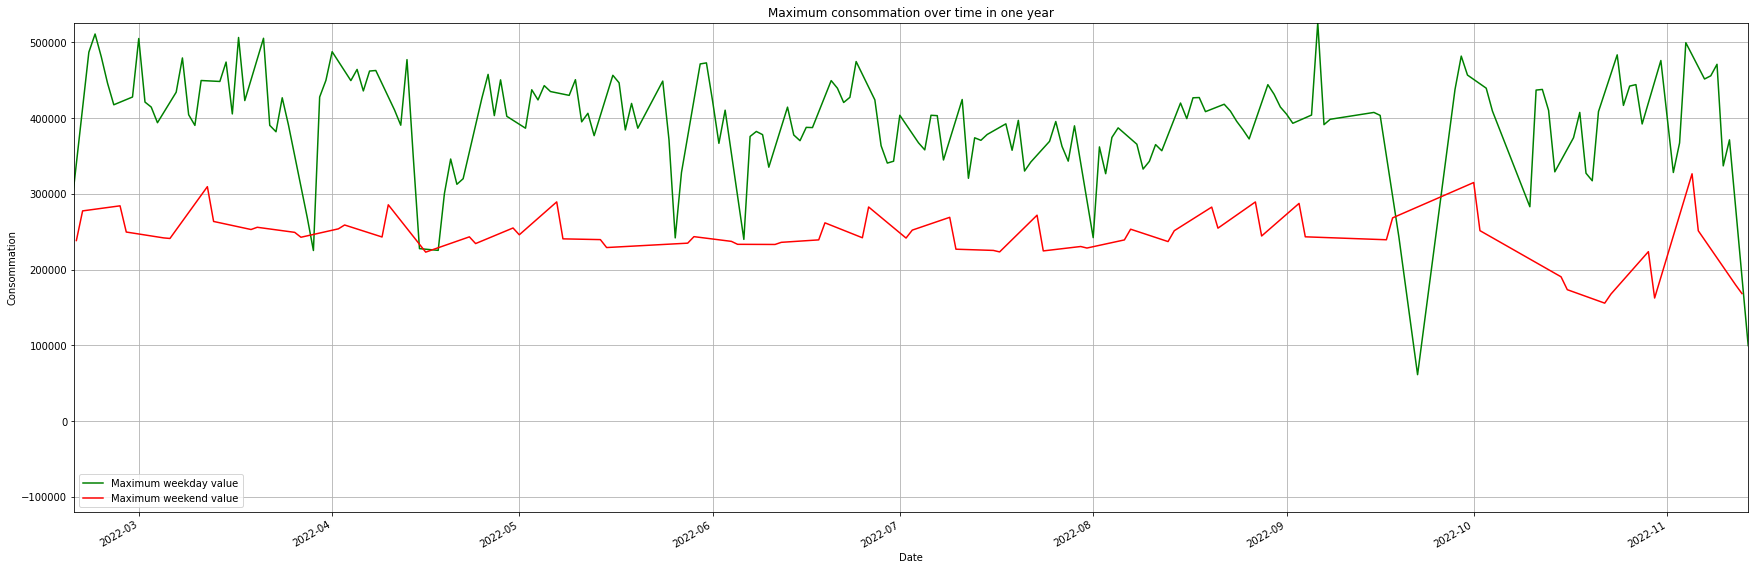

In [15]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].max(), color='green', label="Maximum weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].max(), color='red', label="Maximum weekend value")
    ax.set_title('Maximum consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

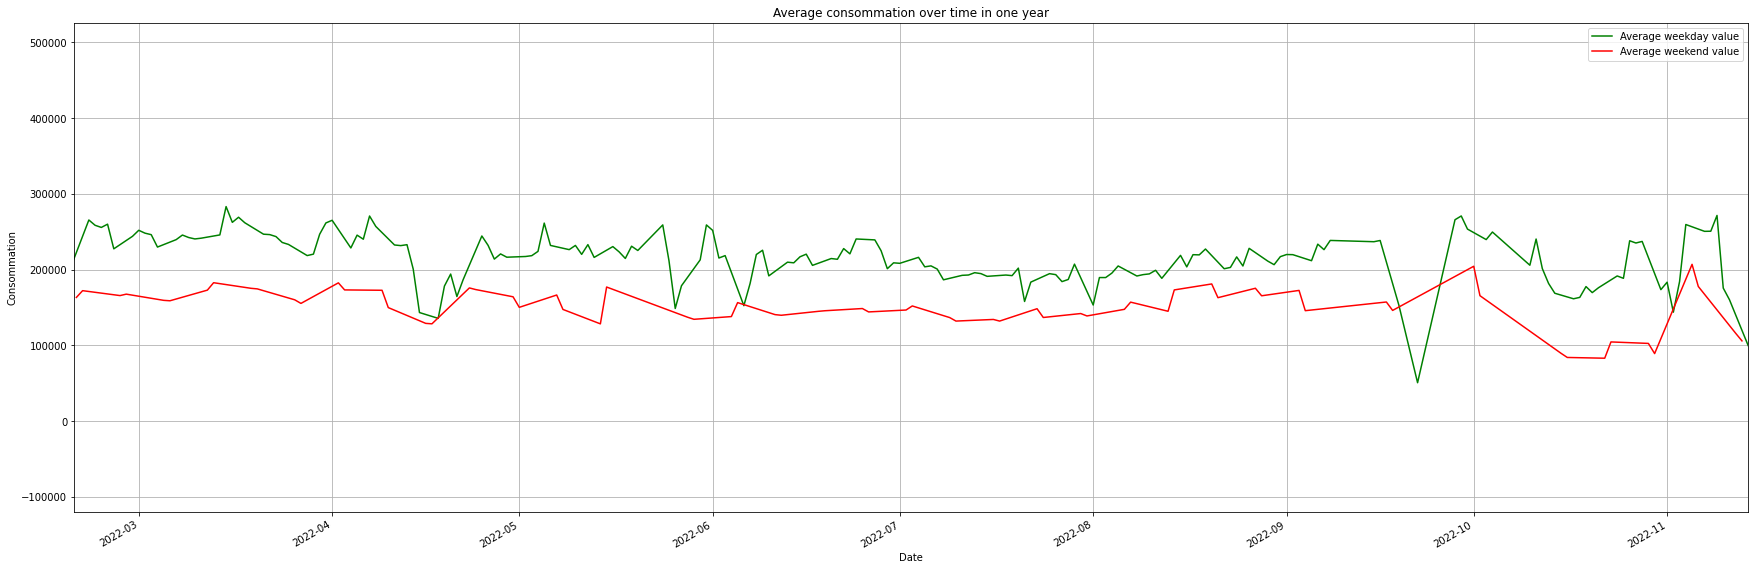

In [16]:
def plot_consommation_over_time_winter_peak():
    fig, ax = plt.subplots(figsize=(30, 10))
    #ax.plot(df['Date'], df['Value'], color='blue')
    #ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red')
    ax.plot(df[df['Weekend'] == 0].groupby(df['Date'].dt.date)['Value'].mean(), color='green', label="Average weekday value")
    ax.plot(df[df['Weekend'] == 1].groupby(df['Date'].dt.date)['Value'].mean(), color='red', label="Average weekend value")
    ax.set_title('Average consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter_peak()

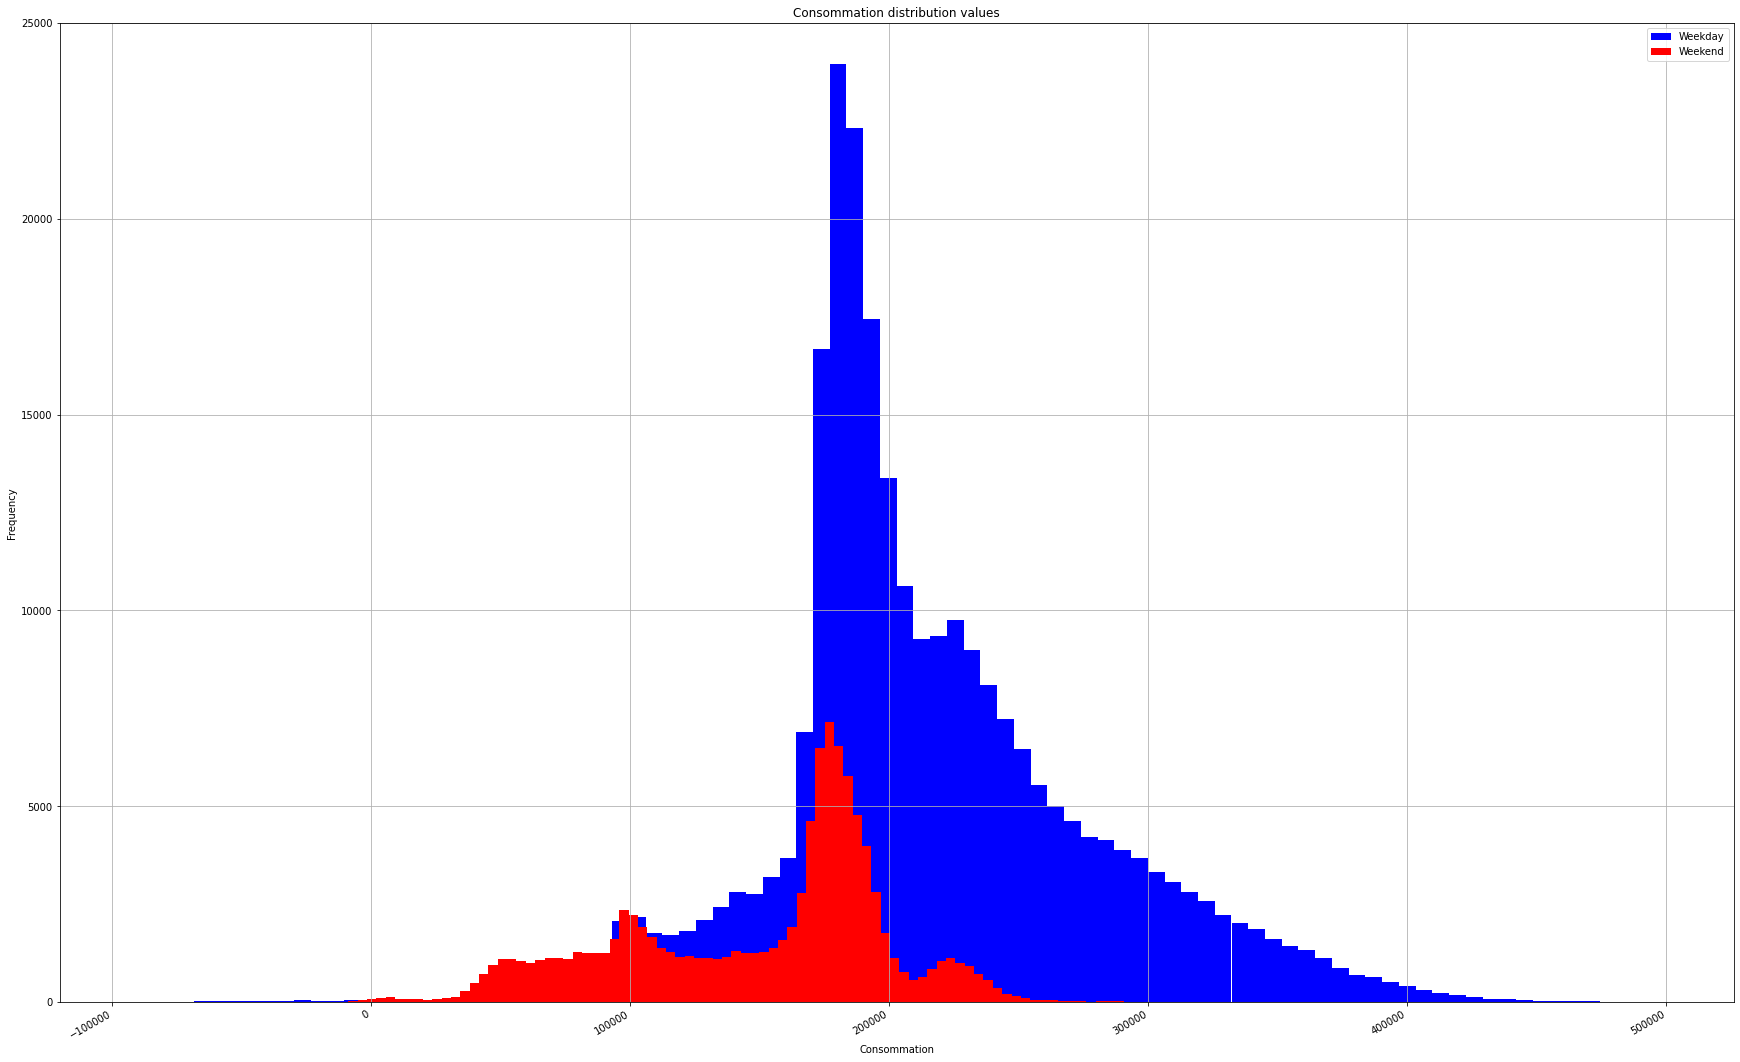

In [17]:
def plot_consommation_over_time_weekend_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Weekend'] == 0]['Value'], bins=100, color='blue', label= "Weekday")
    ax.hist(df[df['Weekend'] == 1]['Value'], bins=100, color='red', label= "Weekend")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 25000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_distribution()

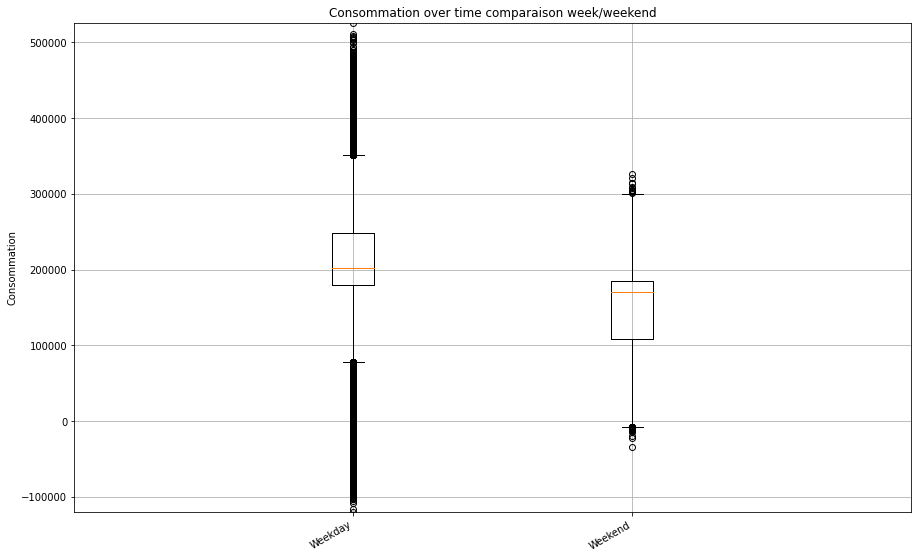

In [18]:
def plot_consommation_over_time_weekend_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Weekend'] == 0]['Value'], df[df['Weekend'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison week/weekend')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Weekday', 'Weekend'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_weekend_boxplot()

## Winter vs Summer

In [19]:
# winter 1 and summer 0
df['Winter'] = df['Date'].dt.month.isin([11,12,1,2,3]).astype(int)
df.tail()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend,Winter
362000,2022-11-13 23:56:00,97817.538,2022,11,13,6,23,56,0,1,1
362001,2022-11-13 23:57:00,97344.145,2022,11,13,6,23,57,0,1,1
362002,2022-11-13 23:58:00,96617.403,2022,11,13,6,23,58,0,1,1
362003,2022-11-13 23:59:00,96638.174,2022,11,13,6,23,59,0,1,1
362004,2022-11-14 00:00:00,99724.063,2022,11,14,0,0,0,0,0,1


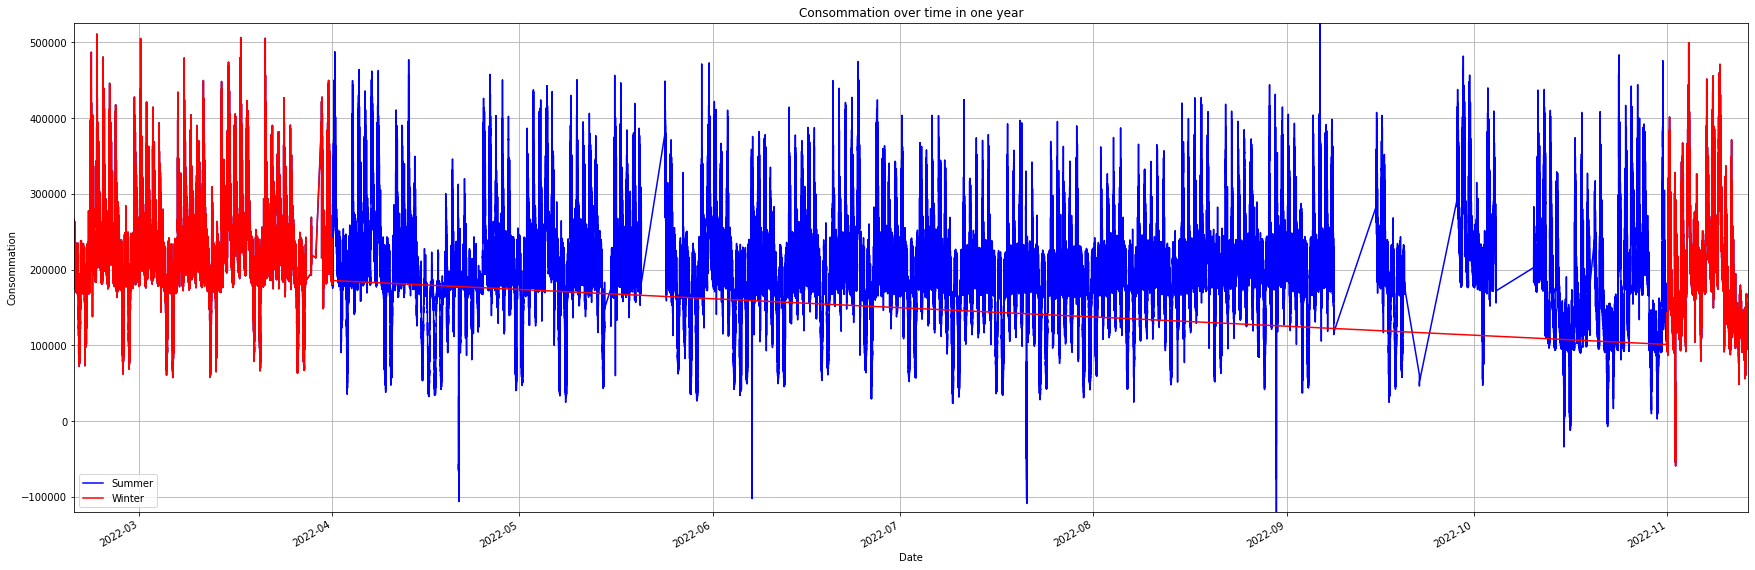

In [20]:
#plot the value with another color for the winter days
def plot_consommation_over_time_winter():
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(df['Date'], df['Value'], color='blue', label= "Summer")
    ax.plot(df[df['Winter'] == 1]['Date'], df[df['Winter'] == 1]['Value'], color='red', label= "Winter")
    ax.set_title('Consommation over time in one year')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df['Date'].min(), df['Date'].max())
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_winter()

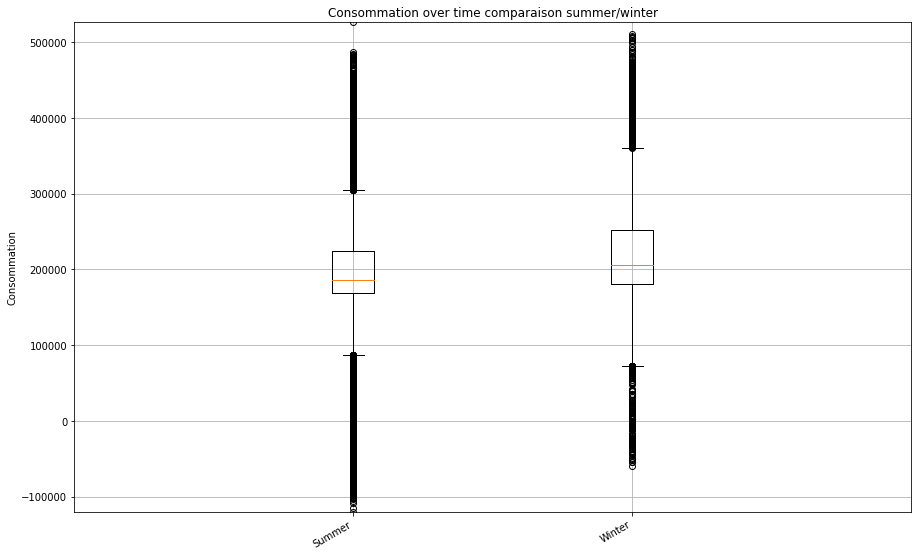

In [21]:
def plot_consommation_over_time_winter_boxplot():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Winter'] == 0]['Value'], df[df['Winter'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison summer/winter')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Summer', 'Winter'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_boxplot()

- Train network with temperature input to predict the day ahead

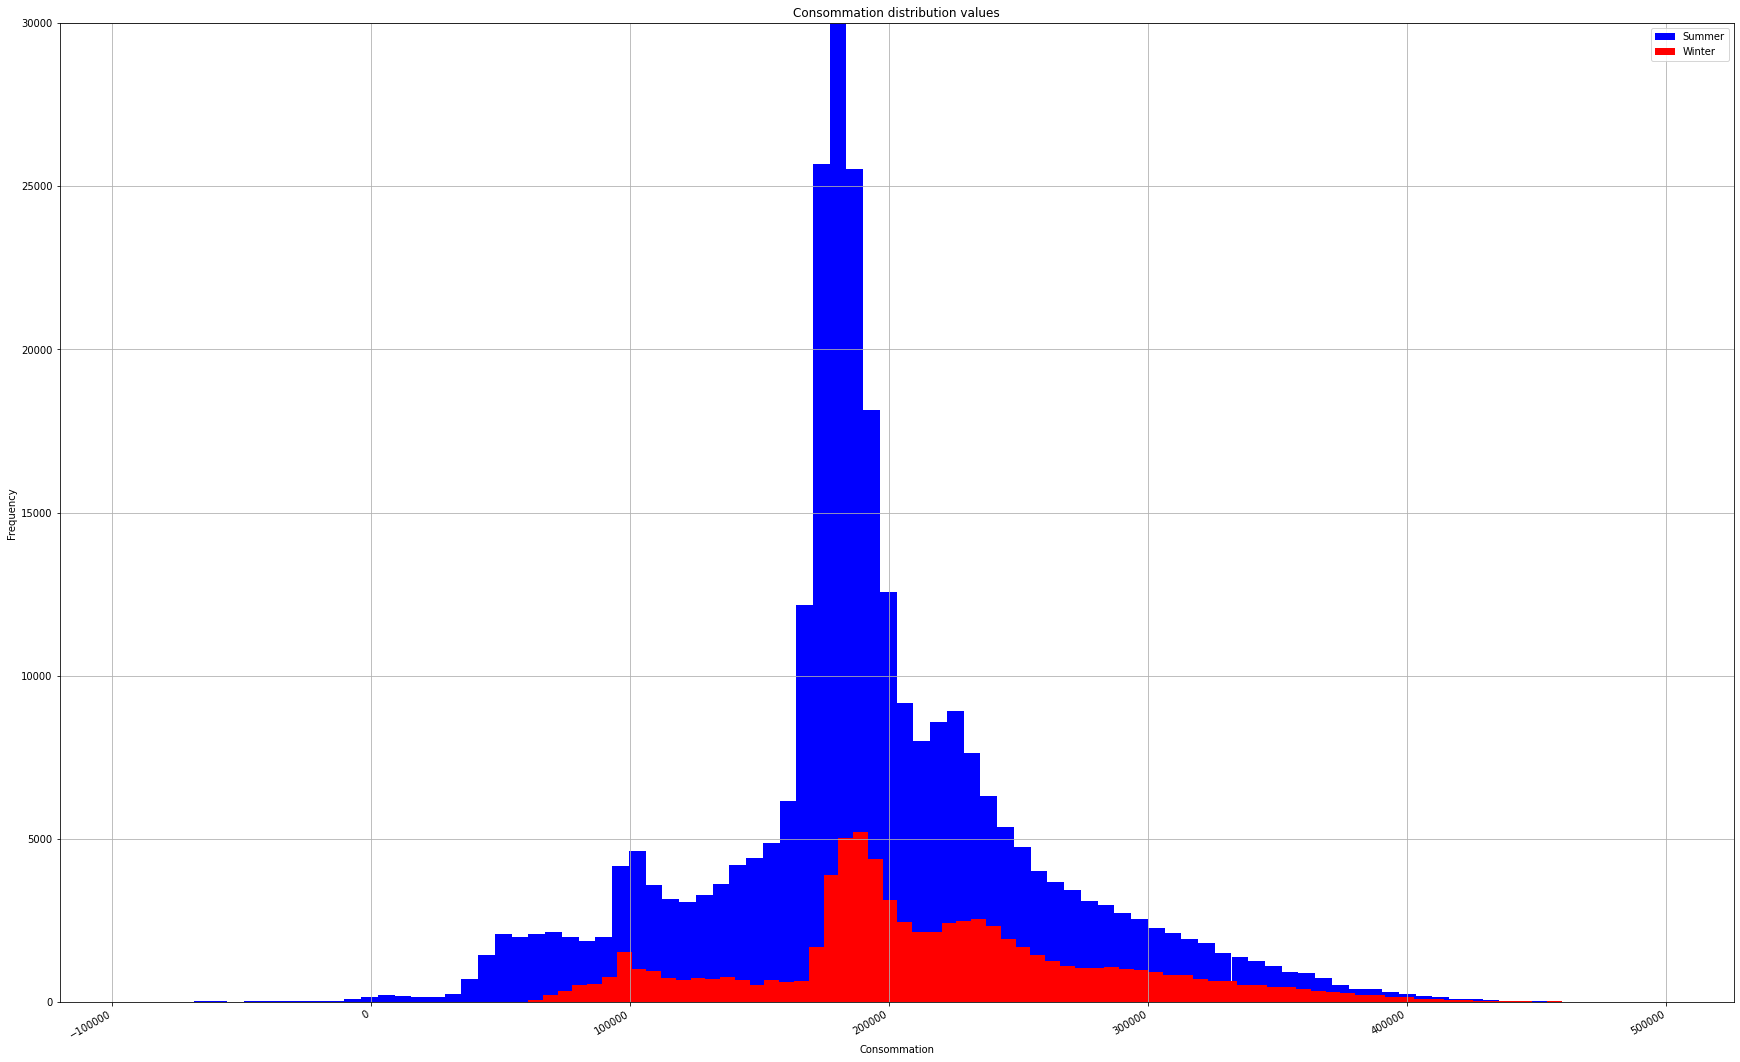

In [22]:
def plot_consommation_over_time_winter_distribution():
    fig, ax = plt.subplots(figsize=(30, 20))
    ax.hist(df[df['Winter'] == 0]['Value'], bins=100, color='blue', label= "Summer")
    ax.hist(df[df['Winter'] == 1]['Value'], bins=100, color='red', label= "Winter")
    ax.set_title('Consommation distribution values')
    ax.set_xlabel('Consommation')
    ax.set_ylabel('Frequency')
    ax.set_xlim(df['Value'].min(), df['Value'].max())
    ax.set_ylim(0, 30000)
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()

    plt.show()

plot_consommation_over_time_winter_distribution()

## Working hours vs Free hours

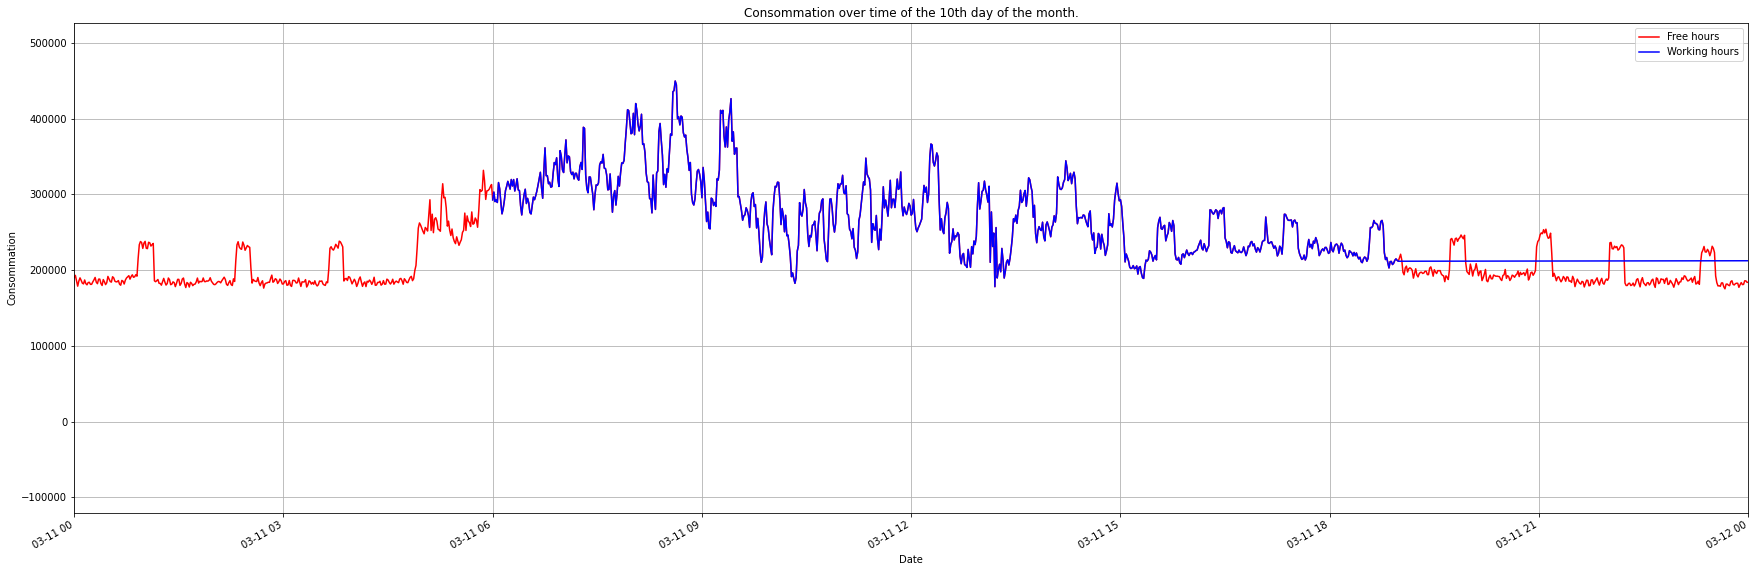

In [23]:
#function to plot the value for a chosen day that is a parameter

def plot_consommation_over_time_day(day):
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot( df[df['Date'].dt.day == day]['Date'], df[df['Date'].dt.day == day]['Value'], color='red', label= "Free hours")
    ax.plot( df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Date'], df[(df['Date'].dt.day == day) & (df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)]['Value'], color='blue', label= "Working hours")
    ax.set_title("Consommation over time of the 10th day of the month.")
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df[df['Date'].dt.day == day]['Date'].min(), df[df['Date'].dt.day == day]['Date'].min() + pd.Timedelta(days=1))
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    ax.legend()
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_day(11)

In [24]:
df['Working hour'] = ((df['Date'].dt.hour >= 6) & (df['Date'].dt.hour < 19)).astype(int)

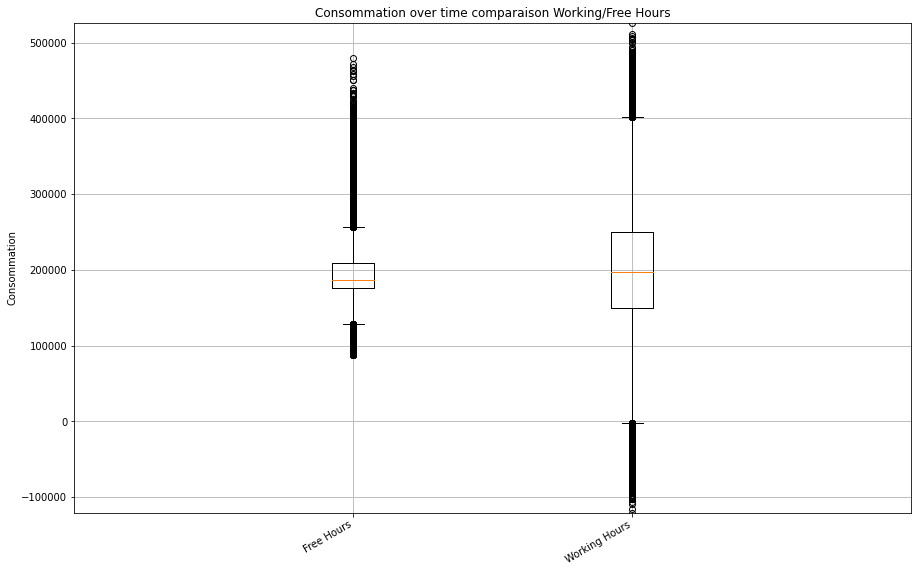

In [25]:
def plot_consommation_working_hours():
    fig, ax = plt.subplots(figsize=(15, 10))
    ax.boxplot([df[df['Working hour'] == 0]['Value'], df[df['Working hour'] == 1]['Value']])
    ax.set_title('Consommation over time comparaison Working/Free Hours')
    ax.set_ylabel('Consommation')
    ax.set_xlim(0, 3)
    ax.set_ylim(df['Value'].min(), df['Value'].max())
    ax.grid(True)
    plt.xticks([1, 2], ['Free Hours', 'Working Hours'])
    fig.autofmt_xdate()

    plt.show()

plot_consommation_working_hours()

# Data Normalization

In [26]:
df['Mean'] = df['Value'].mean()
df['Variance'] = df['Value'].var()
df['Normalized'] = (df['Value'] - df['Mean']) / df['Variance']

<AxesSubplot:>

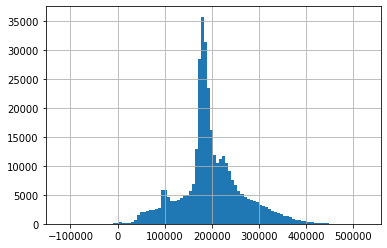

In [27]:
df.head()
#histograms pour voir si on garde la meme distribution en normalisant
df['Value'].hist(bins=100) 
df['Normalized'].hist(bins=100)

In [28]:
df.head()

,Date,Value,Year,Month,Day,Day_of_week,Hour,Minute,Second,Weekend,Winter,Working hour,Mean,Variance,Normalized
79143,2022-02-18 15:39:00,212141.645,2022,2,18,4,15,39,0,0,1,1,197764.93159,4.322846e+09,0.000003
79144,2022-02-18 15:40:00,216980.618,2022,2,18,4,15,40,0,0,1,1,197764.93159,4.322846e+09,0.000004
79145,2022-02-18 15:41:00,219702.692,2022,2,18,4,15,41,0,0,1,1,197764.93159,4.322846e+09,0.000005
79146,2022-02-18 15:42:00,218002.962,2022,2,18,4,15,42,0,0,1,1,197764.93159,4.322846e+09,0.000005
79147,2022-02-18 15:43:00,219366.764,2022,2,18,4,15,43,0,0,1,1,197764.93159,4.322846e+09,0.000005


# Generate Cycle for Dates

In [85]:
def generate_cycle(array, nb_div):
    re_part = np.ones(len(array))
    im_part = np.ones(len(array))

    for k in range(len(array)):
        z = np.exp(array[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

In [65]:
def plot_cycle(re_part, im_part, title):
    fig, ax = plt.subplots(figsize=(6, 5))
    ax.plot(re_part, im_part, '+')
    ax.set_title(title)
    ax.set_xlabel('Real Part')
    ax.set_ylabel('Imaginary Part')
    ax.grid(True)
    plt.show()

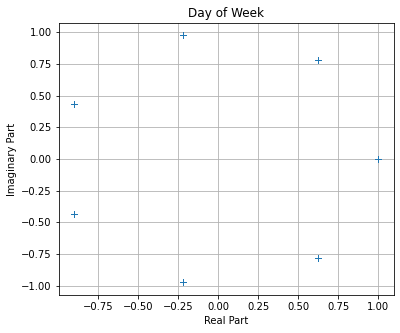

In [86]:
day_of_week_re, day_of_week_im = generate_cycle(df['Day_of_week'].to_numpy(), 7)
plot_cycle(day_of_week_re, day_of_week_im, 'Day of Week')

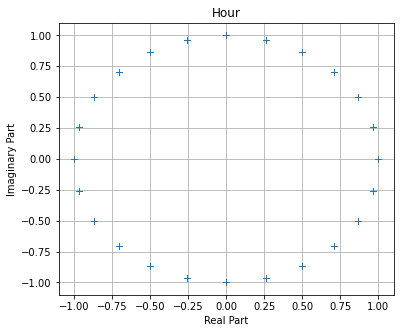

In [87]:
hour_re, hour_im = generate_cycle(df['Hour'].to_numpy(), 24)
plot_cycle(hour_re, hour_im, 'Hour')

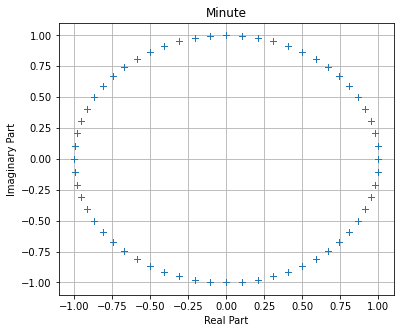

In [88]:
minute_re, minute_im = generate_cycle(df['Minute'].to_numpy(), 60)
plot_cycle(minute_re, minute_im, 'Minute')

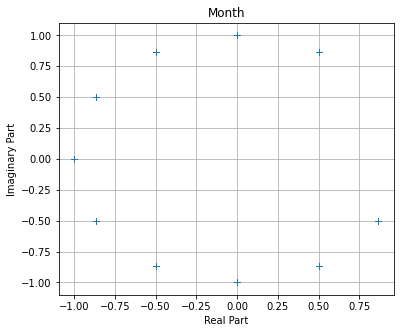

In [89]:
month_re, month_im = generate_cycle(df['Month'].to_numpy(), 12)
plot_cycle(month_re, month_im, 'Month')

In [90]:
def generate_cycle_days(days, months, year):
    re_part = np.ones(len(days))
    im_part = np.ones(len(days))

    lst_31 = [1, 3, 5, 7, 8, 10, 12] # Months with 31 days
    lst_30 = [4, 6, 9, 11] # Months with 30 days

    for k in range(len(days)):
        if months[k] in lst_31:
            nb_div = 31
        elif months[k] in lst_30:
            nb_div = 30
        elif months[k] == 2:
            if (year[k]%4==0 and year[k]%100!=0 or year[k]%400==0):
                nb_div = 29
            else:
                nb_div = 29
        else: 
            print('Error in Months')
            break

        z = np.exp(days[k]*2j*np.pi/nb_div)
        re_part[k] = np.real(z)
        im_part[k] = np.imag(z)

    return re_part, im_part

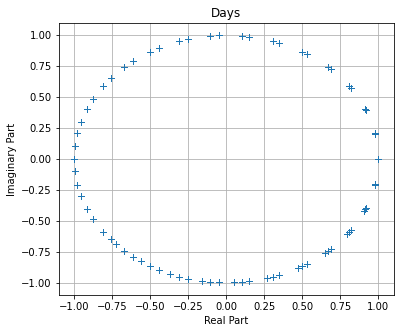

In [91]:
days_re, days_im = generate_cycle_days(df['Day'].to_numpy(), df['Month'].to_numpy(), df['Year'].to_numpy())
plot_cycle(days_re, days_im, 'Days')

In [108]:
param = list(set(list(df.columns)) - set(['Mean', 'Variance', 'Normalized', 'Date', 'Second', 'Year', 'Month', 'Day', 'Day_of_week', 'Hour', 'Minute']))
new_df = df[param]
new_df = new_df.assign(Day_of_Week_re=day_of_week_re.tolist())
new_df = new_df.assign(Day_of_Week_im=day_of_week_im.tolist())
new_df = new_df.assign(Hour_re=hour_re.tolist())
new_df = new_df.assign(Hour_im=hour_im.tolist())
new_df = new_df.assign(Minute_re=minute_re.tolist())
new_df = new_df.assign(Minute_im=minute_im.tolist())
new_df = new_df.assign(Month_re=month_re.tolist())
new_df = new_df.assign(Month_im=month_im.tolist())
new_df = new_df.assign(Day_re=days_re.tolist())
new_df = new_df.assign(Day_im=days_im.tolist())
new_df.head()

,Value,Working hour,Winter,Weekend,Day_of_Week_re,Day_of_Week_im,Hour_re,Hour_im,Minute_re,Minute_im,Month_re,Month_im,Day_re,Day_im
79143,212141.645,1,1,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.587785,-0.809017,0.5,0.866025,-0.725995,-0.687699
79144,216980.618,1,1,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.500000,-0.866025,0.5,0.866025,-0.725995,-0.687699
79145,219702.692,1,1,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.406737,-0.913545,0.5,0.866025,-0.725995,-0.687699
79146,218002.962,1,1,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.309017,-0.951057,0.5,0.866025,-0.725995,-0.687699
79147,219366.764,1,1,0,-0.900969,-0.433884,-0.707107,-0.707107,-0.207912,-0.978148,0.5,0.866025,-0.725995,-0.687699


# Modeling

In [27]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [49]:
target_column = ['Value']
predictors = list(set(list(df.columns)) - set(target_column) - set(['Mean', 'Variance', 'Normalized', 'Date', 'Second']))


X = df[predictors]
y = df[target_column]
# Split into 70% train and 30% test not random to keep the time order
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)


In [50]:
X.head()

,Year,Month,Day,Hour,Minute,Working hour,Weekend,Winter,Day_of_week
79143,2022,2,18,15,39,1,0,1,4
79144,2022,2,18,15,40,1,0,1,4
79145,2022,2,18,15,41,1,0,1,4
79146,2022,2,18,15,42,1,0,1,4
79147,2022,2,18,15,43,1,0,1,4


In [52]:
#Bon j'ai un peu copie ca d'un site mais il aime pas le datetime, a changer mais je pense c'est une bonne base
reg_all = MLPRegressor(hidden_layer_sizes=(100, 100, 100), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
reg_all.fit(X_train, y_train)


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1607: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(hidden_layer_sizes=(100, 100, 100))

In [53]:
y_pred = reg_all.predict(X_test)

rmse = sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(rmse)
print(r2)

62848.10904518092
0.20236136759514234


In [54]:
y_test_=y_test
y_pred_=y_pred


In [55]:
#add to y_test and y_pred the year month day hour minute second
y_test_['Year'] = X_test['Year']
y_test_['Month'] = X_test['Month']
y_test_['Day'] = X_test['Day']
y_test_['Hour'] = X_test['Hour']
y_test_['Minute'] = X_test['Minute']


y_test_['Date'] = pd.to_datetime(y_test_[['Year', 'Month', 'Day', 'Hour', 'Minute']])
y_test_ = y_test_.drop(['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1)

y_test_.head()


y_pred_ = pd.DataFrame(y_pred_, index=y_test_.index)
y_pred_['Date'] = y_test_['Date']




In [58]:
y_pred_.head()
#create a dataframe with the date and the real value and the predicted value
df_pred = pd.DataFrame()
df_pred['Date'] = y_pred_['Date']
df_pred['Real'] = y_test_['Value']
df_pred['Predicted'] = y_pred_[0]
df_pred.head()


,Date,Real,Predicted
301495,2022-08-07 23:11:00,169472.292,212546.770669
301496,2022-08-07 23:12:00,171837.417,212491.726640
301497,2022-08-07 23:13:00,173412.672,212436.682610
301498,2022-08-07 23:14:00,174419.729,212381.638580
301499,2022-08-07 23:15:00,176533.934,212326.594550


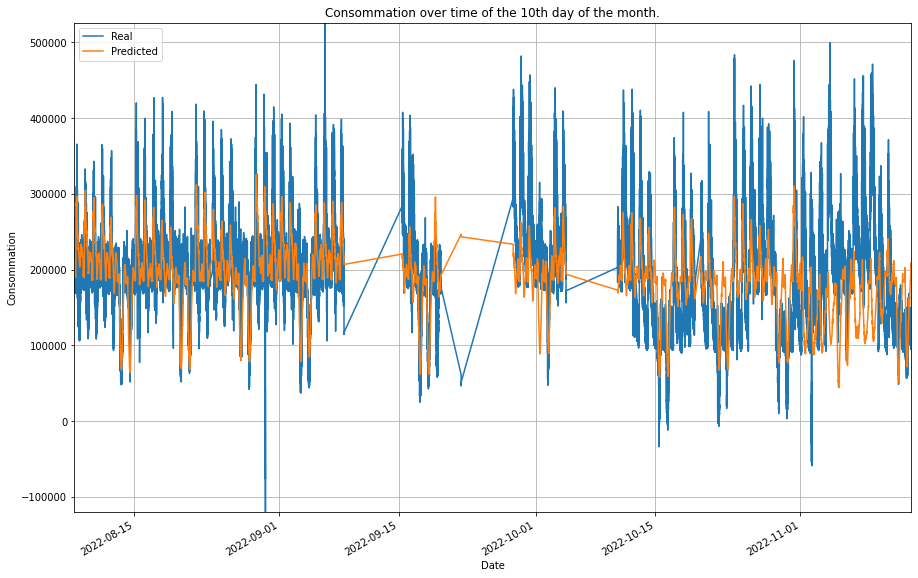

In [59]:
#plot the real value and the predicted value
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(df_pred['Date'], df_pred['Real'], label='Real')
ax.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
ax.set_title("Consommation over time of the 10th day of the month.")
ax.set_xlabel('Date')
ax.set_ylabel('Consommation')
ax.set_xlim(df_pred['Date'].min(), df_pred['Date'].max())
ax.set_ylim(df_pred['Real'].min(), df_pred['Real'].max())
ax.grid(True)
ax.legend()
fig.autofmt_xdate()
plt.show()



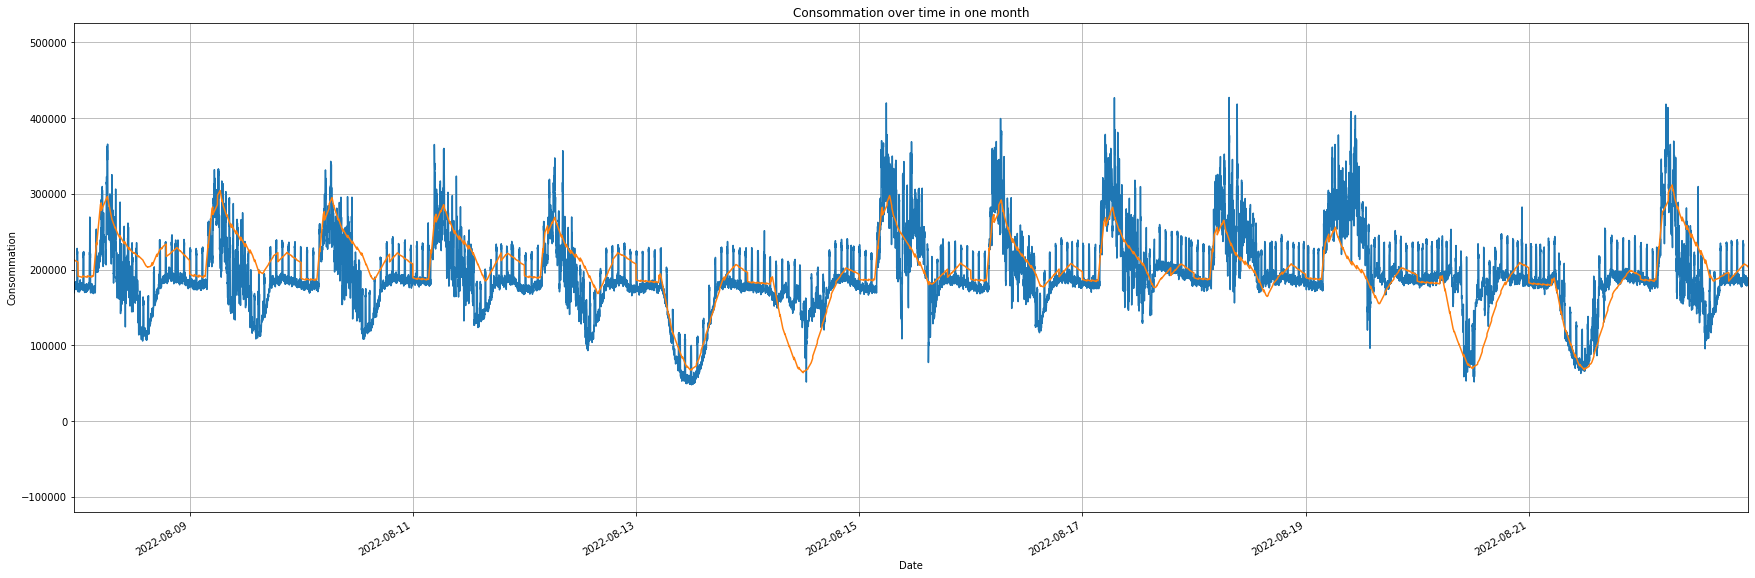

In [71]:
def plot_consommation_over_time_zoomed_graph():
    fig, ax = plt.subplots(figsize=(30, 10))
    
    ax.plot(df_pred['Date'], df_pred['Real'], label='Real')
    ax.plot(df_pred['Date'], df_pred['Predicted'], label='Predicted')
    ax.set_title('Consommation over time in one month')
    ax.set_xlabel('Date')
    ax.set_ylabel('Consommation')
    ax.set_xlim(df_pred['Date'].min(), df_pred['Date'].min() + pd.Timedelta(days=15))
    ax.set_ylim(df_pred['Real'].min(), df_pred['Real'].max())
    ax.grid(True)
    fig.autofmt_xdate()
    plt.show()

plot_consommation_over_time_zoomed_graph()
